In [169]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [170]:
def get_Qr(T):
    return (q*Cp + hA)*T - q*Cp*Tf - hA*Tcf

def get_Qg(T):
    return (deltaH_neg*v*q*Cf*k0*math.exp(-E/(R*T)))/(q + v*k0*math.exp(-E/(R*T)))

def get_f(T):
    return get_Qg(T) - get_Qr(T)

def get_C(T):
    return q*Cf/(q + v*k0*math.exp(-E/(R*T)))

def get_df(T):
    return deltaH_neg*v*(q**2)*Cf*k0*E*math.exp(E/(R*T))/((T**2)*((q*math.exp(E/(R*T)) + v*k0)**2)) - q*Cp - hA

def get_newT(T,C):
    return (deltaH_neg*v*k0*C*math.exp(-E/(R*T)) + hA*Tcf + q*Cp*Tf)/(q*Cp + hA)

In [171]:
q = 0.1
v = 0.1
k0 = 9703*3600
deltaH_neg = 5960
E = 11843
Cp = 500
hA = 15
R = 1.987
Tcf = 298.5
Tf = 298.15
Cf = 10

[312, 338, 369] [895.0000000000018, 2585.000000000002, 4600.000000000002]


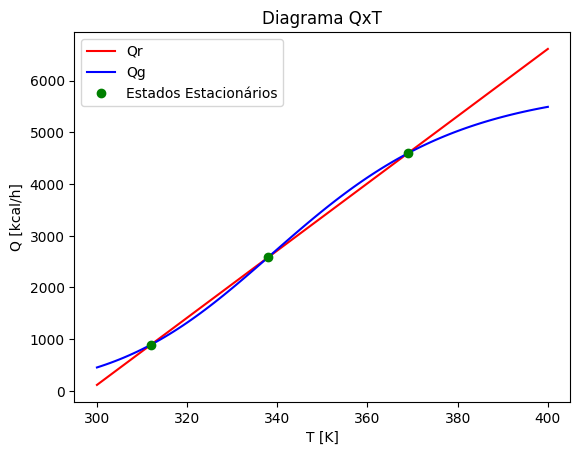

In [172]:
T = [value for value in range(401) if value>=300 and value<=400]

Qr = []
Qg = []
zerosT = []
zerosQ = []

for i, temperature in enumerate(T):
    Qr.append(get_Qr(temperature))
    Qg.append(get_Qg(temperature))
    if abs(Qr[i] - Qg[i]) <= 5:    
        zerosT.append(temperature)
        zerosQ.append(Qr[i])

print(zerosT,zerosQ)

fig, ax = plt.subplots()
qr, qg, ee = ax.plot(T,Qr,'r',T,Qg,'b',zerosT,zerosQ,'go')
qr.set_label('Qr')
qg.set_label('Qg')
ee.set_label("Estados Estacionários")
plt.title('Diagrama QxT')
plt.xlabel('T [K]')
plt.ylabel('Q [kcal/h]')
plt.legend()
plt.show()

In [173]:
tolerance = 10**-25
error = 1
T0 = 312
C = []
T = [T0]
i = 0
while error > tolerance and i <= 10000:
    f = get_f(T[i])
    df = get_df(T[i])
    C.append(get_C(T[i]))
    T.append(T[i] - f/df)
    error = abs((T[i+1]-T[i])/T[i])
    i += 1

print(f'Tee = {T[len(T)-1]:.0f}K, Cee = {C[len(C)-1]:.2f}mol/L rodando {i} iterações')



Tee = 338K, Cee = 5.69mol/L rodando 239 iterações


In [174]:
tolerance = 10**-25
error = 1
T0 = 337
C = []
T = [T0]
i = 0
while error > tolerance and i <= 10000:
    C.append(get_C(T[i]))
    T.append(get_newT(T[i],C[i]))
    error = abs((T[i+1]-T[i])/T[i])
    i += 1

print(f'Tee = {T[len(T)-1]:.0f}K, Cee = {C[len(C)-1]:.2f}mol/L rodando {i} iterações')


Tee = 312K, Cee = 8.50mol/L rodando 120 iterações


In [175]:
tolerance = 10**-25
error = 1
T0 = 367
C = []
T = [T0]
i = 0
while error > tolerance and i<=10000:
    C.append(get_C(T[i]))
    T.append(get_newT(T[i],C[i]))
    error = abs((T[i+1]-T[i])/T[i])
    i += 1

print(f'Tee = {T[len(T)-1]:.0f}K, Cee = {C[len(C)-1]:.2f}mol/L rodando {i} iterações')


Tee = 369K, Cee = 2.29mol/L rodando 88 iterações


[0, 350]
[  0. 350.] e
0.0 350.0 w
[1.22679244e-05 3.49999917e+02] e
1.2267924416869813e-05 349.99991743686866 w
[1.22678882e-05 3.49999917e+02] e
1.2267888230097895e-05 349.9999174372523 w
[2.45357765e-05 3.49999835e+02] e
2.453577646040927e-05 349.9998348745046 w
[2.45357403e-05 3.49999835e+02] e
2.4535740273913906e-05 349.9998348748882 w
[7.58844312e-03 3.49948957e+02] e
0.007588443123361039 349.94895662593433 w
[7.58845935e-03 3.49948956e+02] e
0.007588459354555394 349.9489564276029 w
[1.51386340e-02 3.49898224e+02] e
0.015138634030462523 349.89822368255665 w
[1.51386663e-02 3.49898223e+02] e
0.015138666294906483 349.89822328830195 w
[2.26751888e-02 3.49847635e+02] e
0.02267518875339921 349.847635063714 w
[2.26752208e-02 3.49847635e+02] e
0.022675220756857153 349.84763467266697 w
[5.02136400e-02 3.49663234e+02] e
0.050213639955778086 349.66323351425086 w
[5.02138073e-02 3.49663231e+02] e
0.05021380727810473 349.66323147004505 w
[4.51227371e-02 3.49697270e+02] e
0.04512273707171727 

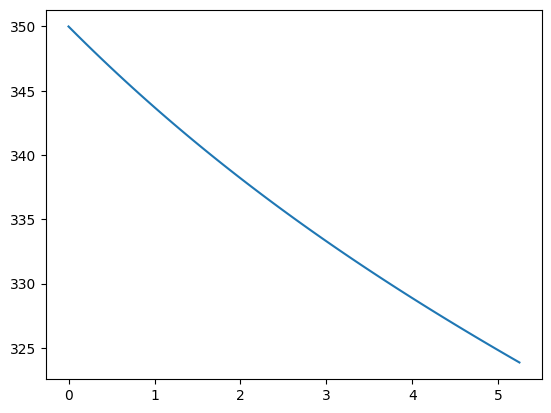

[0, 350]
[  0. 350.] e
0.0 350.0 w


TypeError: unsupported operand type(s) for /: 'float' and 'list'

In [176]:
def dSdt(S,t):
    print(S,'e')
    C, T = S
    print(C,T,'w')
    return [q*Cf/v - C*(k0*math.exp(-E/(R*T)) + q/v),
            q*Tf/v + deltaH_neg*k0*C*math.exp(-E/(R*T))/Cp + hA*Tcf/(v*Cp) - T*(q/v + hA/(v*Cp))]

for i in range(2):
    C0 = 0
    T0 = 350

    S0 = [C0,T0]
    print(S0)
    t = np.linspace(0,1,100)
    sol = odeint(dSdt, S0, t)

    C_plot = []
    T_plot = []
    v = []
    for solution in sol:
        C_plot.append(solution[0])
        T_plot.append(solution[1])
        v.append(300.5)

    fig, ax = plt.subplots()
    ax.plot(C_plot,T_plot)
    plt.show()